In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Alcance
En este documento se definirá el alcance de este proyecto para poder enfocarnos finalmente en la información necesaria en base a los criterios elegidos aquí.

En primer lugar analizaremos datos demográficos de Estados Unidos para ver los estados con mayor población y mayor densidad.

In [15]:
#Cargamos el dataset de la población y la densidad de los estados de USA
df_usa=pd.read_csv('Fuentes externas/estados_densidad_poblacion1.csv')


In [16]:
#Cambiamos el tipo de datos de las columnas
df_usa['Densidad']=df_usa['Densidad'].str.replace(',','').astype('float64')
df_usa['Poblacion']=df_usa['Poblacion'].str.replace(',','').astype('int64')
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Estado     54 non-null     object 
 1   Densidad   54 non-null     float64
 2   Poblacion  54 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


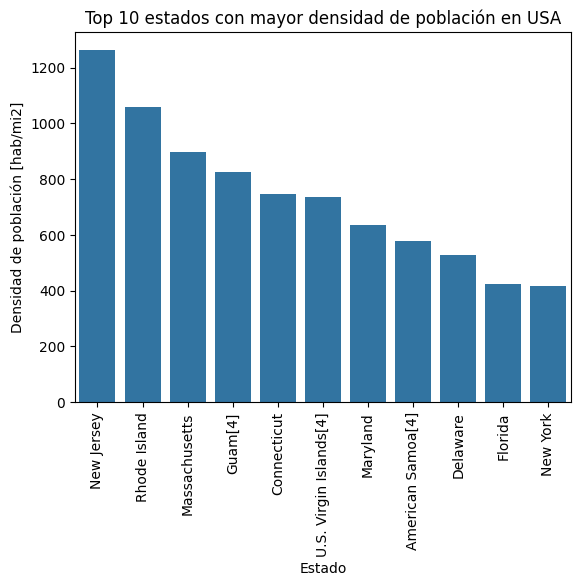

In [17]:
sns.barplot(data=df_usa,x='Estado',y='Densidad',order=df_usa['Estado'].loc[:10])
plt.title('Top 10 estados con mayor densidad de población en USA')
plt.ylabel('Densidad de población [hab/mi2]')
plt.xlabel('Estado')
plt.xticks(rotation=90)
plt.show()

In [18]:
df_usa=df_usa.sort_values(by='Poblacion',ascending=False)
df_usa.reset_index(drop=True,inplace=True)

In [19]:
df_usa

,Estado,Densidad,Poblacion
0,California,250.0,38965193
1,Texas,117.0,30503301
2,Florida,422.0,22610726
3,New York,415.0,19571216
4,Pennsylvania,290.0,12961683
5,Illinois,226.0,12549689
6,Ohio,288.0,11785935
7,Georgia,192.0,11029227
8,North Carolina,223.0,10835491
9,Michigan,178.0,10037261


In [20]:
df_usa['Poblacion'].loc[:5].sum()/df_usa['Poblacion'].sum()

0.4099260619808165

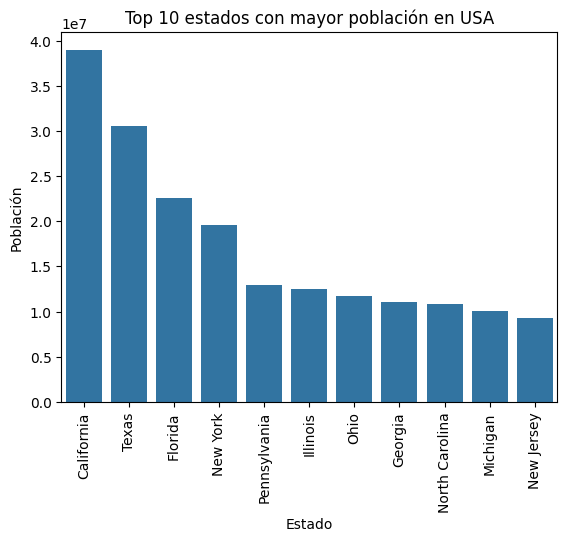

In [21]:
sns.barplot(data=df_usa,x='Estado',y='Poblacion',order=df_usa['Estado'].loc[:10])
plt.title('Top 10 estados con mayor población en USA')
plt.ylabel('Población')
plt.xlabel('Estado')
plt.xticks(rotation=90)
plt.savefig('Top 10 estados con mayor población en USA.png')
plt.show()

Si bien al analizar tanto la densidad como la población es importante destacar que los estados de California, Texas, Florida, Ney York y Pennsylvania reune alrededor del 41% de la población total del país.

*Por lo que es importante centrar el análisis en estos estados en particular.*

Veremos las tendencias de las palabras claves que nos interesan, en este caso son los tipos de negocios mas importantes y se utiliza un csv extraído de Google Trends.

In [22]:
#Cargamos los datos de Google Trends para todo el territorio de Estados Unidos
data_US=pd.read_csv('Fuentes externas/google_trends.csv')


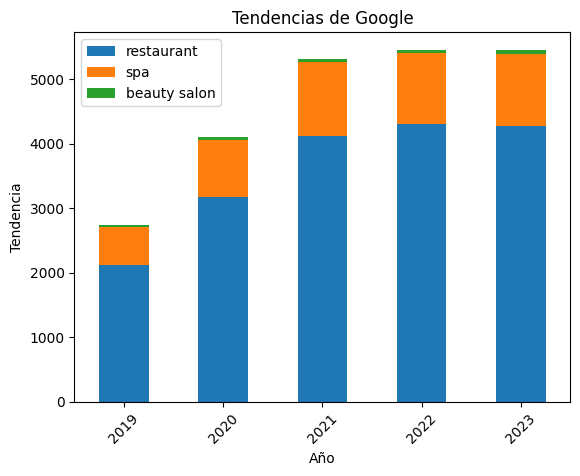

In [23]:
# Asegúrate de que 'date' sea un objeto datetime
data_US['date'] = pd.to_datetime(data_US['date'])

# Extrae el año y crea una nueva columna 'year'
data_US['year'] = data_US['date'].dt.year
data_US=data_US[data_US['year']<2024]
# Agrupa por año y calcula la media
data_US_yearly = data_US.groupby('year').sum(['restaurant', 'spa', 'beauty salon'])

# Crea el gráfico de barras apiladas
data_US_yearly[['restaurant', 'spa', 'beauty salon']].plot(kind='bar', stacked=True)

# Configura el título y las etiquetas de los ejes
plt.title('Tendencias de Google')
plt.xlabel('Año')
plt.ylabel('Tendencia')
plt.xticks(rotation=45)
plt.savefig('Tendencias de Google.png')

# Muestra el gráfico
plt.show()

Como vemos en la gráfica de arriba la palabra clave restaurante es la más buscada por lejos y pareciera tener una tendencia a la alza.

Verificamos ahora si algun estado en particular tiene más preponderancia que otro.

In [24]:
states = ['CA', 'TX', 'FL', 'NY', 'PA']
df_states_trends=pd.DataFrame()
for state in states:
    df=pd.read_csv(f'Fuentes externas/google_trends_{state}.csv')
    df['state']=state
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df=df.groupby(['year','state']).sum(['restaurant', 'spa', 'beauty salon'])
    df_states_trends=pd.concat([df_states_trends,df])


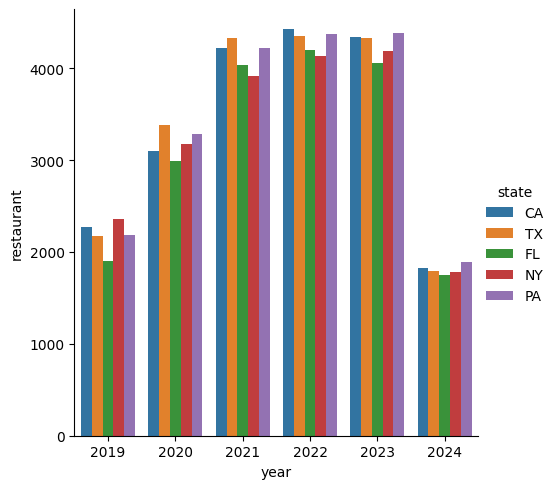

In [25]:
sns.catplot(data=df_states_trends,x='year',y='restaurant',hue='state',kind='bar')

Aquí se puede ver como a lo largo de los años ningnún estado sobresale por sobre los demas en lo que se refier a la búsqueda de la palabra clave restaurant.

Verificamos a continuación que restaurant lidere en las tendencias en todos los estados.

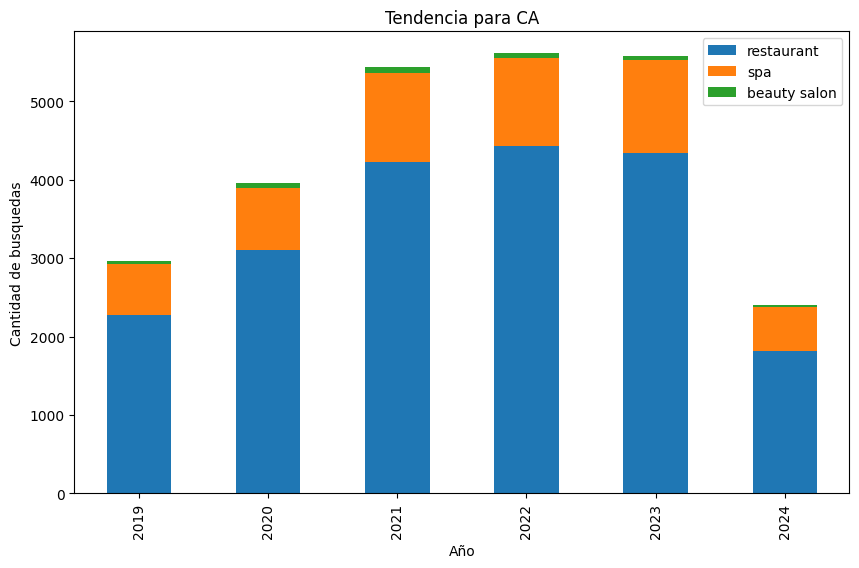

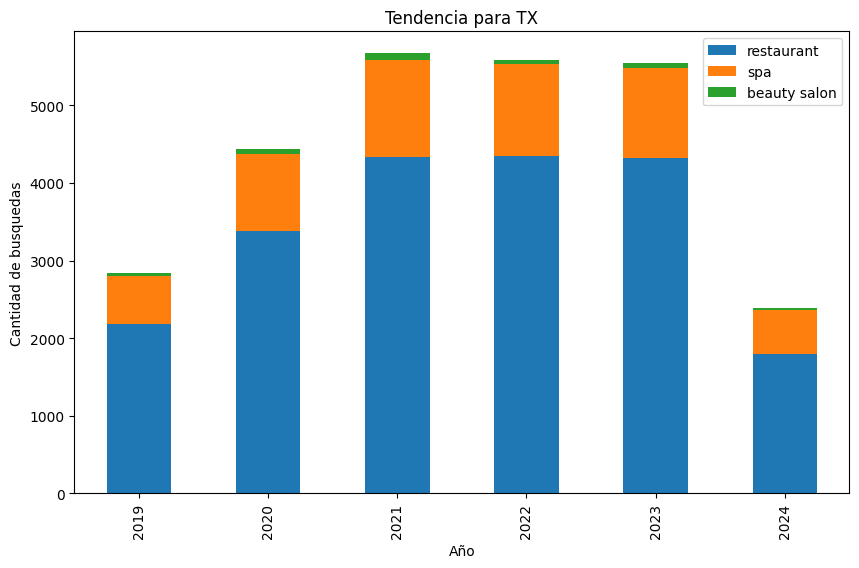

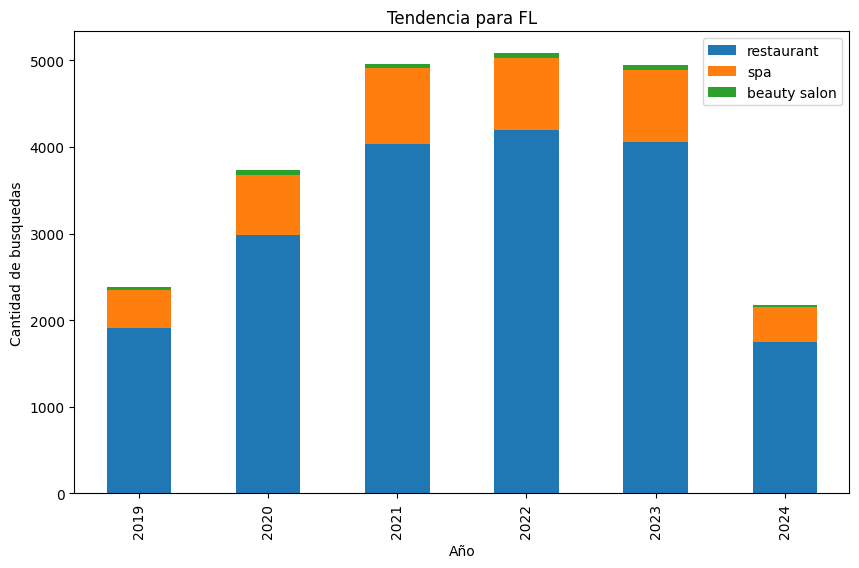

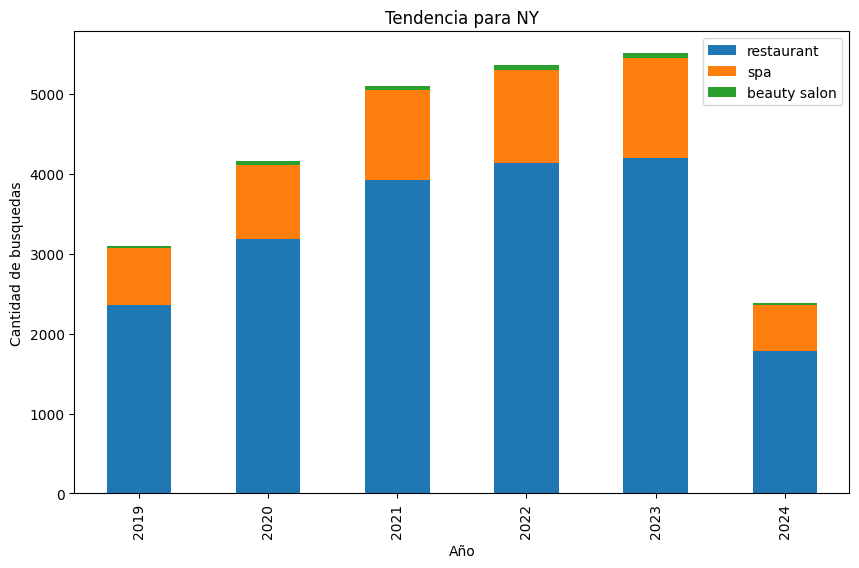

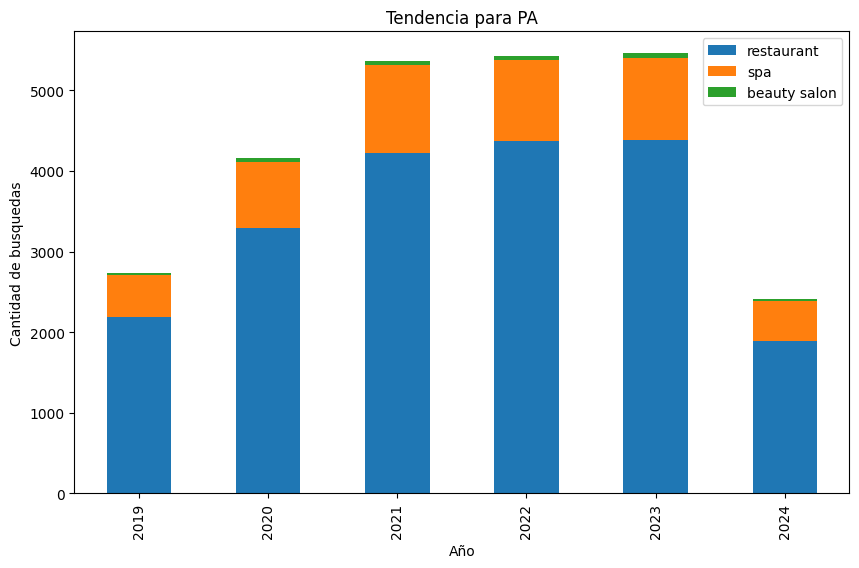

In [26]:

for state in states:
    # lee los datos del estado actual
    data = pd.read_csv(f'Fuentes externas/google_trends_{state}.csv')
    
    # convierte la columna 'date' a datetime y extrae el año
    data['year'] = pd.to_datetime(data['date']).dt.year
    
    # agrupa los datos por año y calcula la media
    data_grouped = data.groupby('year').sum(['restaurant', 'spa', 'beauty salon'])
    
    # crea el gráfico de barras apiladas
    data_grouped[['restaurant', 'spa', 'beauty salon']].plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title(f'Tendencia para {state}')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de busquedas')
    plt.show()

Como se observa en los gráficos por estado la busqueda de la palabra clave restaurant lidere en todos por un amplio margen.

In [27]:
df_states_trends.drop(columns=['spa','beauty salon'],inplace=True)
df_states_trends.reset_index(inplace=True)
df_states_trends=df_states_trends[df_states_trends['year'].isin([2019,2020,2021,2022,2023])]
df_states_trends.drop( columns=['year'],inplace=True)
df_states_trends=df_states_trends.groupby(['state']).sum('restaurant')

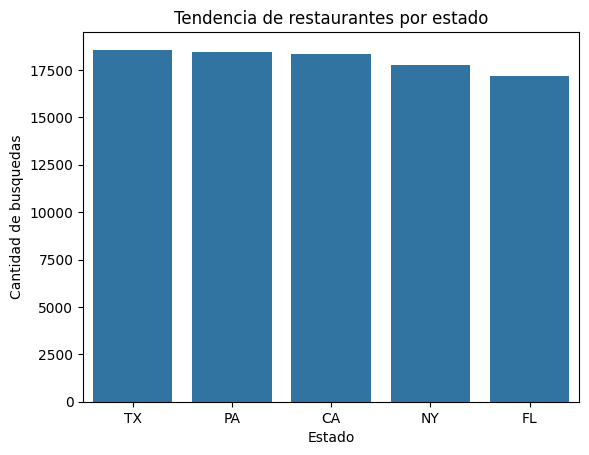

In [28]:
sns.barplot(data=df_states_trends,x='state',y='restaurant',order=df_states_trends.sort_values(by='restaurant',ascending=False).index)
plt.title('Tendencia de restaurantes por estado')
plt.ylabel('Cantidad de busquedas')
plt.xlabel('Estado')
plt.show()

## Conclusiones
En base a todo lo visto, se decide limitar el alcance a los 5 estados siguientes: California, Nueva York, Texas, Pensilvania y Florida de debido a la gran cantidad de población.
La categoría elegida termina siendo restaurant ya que en estos 5 estados no hay diferencias significativas entre ellos y esta categoría es con creces la más busqueda en Google.